# Task 2. Football

In [1]:
import numpy as np
import pandas as pd
import pyreadr
import matplotlib.pyplot as plt

### Data cleaning

In [2]:
# Importing data with pyreadr package.
df = pyreadr.read_r("f_data_sm.rda")["f_data_sm"]

In [3]:
df.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHG,FTAG,FTTG,H,D,A
0,1994.0,England,Premier League,1993-08-14,Arsenal,Coventry,0-3,A,0.0,3.0,3.0,NaN,NaN,NaN
1,1994.0,England,Premier League,1993-08-14,Aston Villa,QPR,4-1,H,4.0,1.0,5.0,NaN,NaN,NaN
2,1994.0,England,Premier League,1993-08-14,Chelsea,Blackburn,1-2,A,1.0,2.0,3.0,NaN,NaN,NaN
3,1994.0,England,Premier League,1993-08-14,Liverpool,Sheffield Weds,2-0,H,2.0,0.0,2.0,NaN,NaN,NaN
4,1994.0,England,Premier League,1993-08-14,Man City,Leeds,1-1,D,1.0,1.0,2.0,NaN,NaN,NaN


In [4]:
# Renaming columns.
df = df.rename(columns={'FTSC': 'SCORE',
                   'FTR': 'WON',
                   'FTHG': 'HOME_GOALS',
                   'FTAG': 'AWAY_GOALS',
                   'FTTG': 'TOTAL_GOALS'})

In [5]:
# Counting missing values.
df.isna().sum()

SEASON             0
COUNTRY            0
LEAGUE             0
DATE               0
HOMETEAM           0
AWAYTEAM           0
SCORE              0
WON                1
HOME_GOALS         2
AWAY_GOALS         2
TOTAL_GOALS        2
H              30156
D              30156
A              30156
dtype: int64

In [6]:
# Dropping H, D and A columns. They show bet coefficients, which we won't need.
df = df.drop(['H', 'D', 'A'], axis = 1)
# Printing rows where the values for column HOME_GOALS are missing. 
df[df['HOME_GOALS'].isna()]

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,SCORE,WON,HOME_GOALS,AWAY_GOALS,TOTAL_GOALS
74002,2015.0,Greece,Ethniki Katigoria,2015-05-10,Niki Volos,OFI,NA-NA,NaN,NaN,NaN,NaN
87773,2019.0,Greece,Ethniki Katigoria,2019-03-17,Panathinaikos,Olympiakos,NA-NA,,NaN,NaN,NaN


In [7]:
# Dropping those 2 rows.
df = df.dropna()

In [8]:
# Checking column types.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87814 entries, 0 to 87815
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   SEASON       87814 non-null  float64       
 1   COUNTRY      87814 non-null  object        
 2   LEAGUE       87814 non-null  object        
 3   DATE         87814 non-null  datetime64[ns]
 4   HOMETEAM     87814 non-null  object        
 5   AWAYTEAM     87814 non-null  object        
 6   SCORE        87814 non-null  object        
 7   WON          87814 non-null  object        
 8   HOME_GOALS   87814 non-null  float64       
 9   AWAY_GOALS   87814 non-null  float64       
 10  TOTAL_GOALS  87814 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 8.0+ MB


In [9]:
# Changing types for columns SEASON, HOME_GOALS, AWAY_GOALS and TOTAL_GOALS to integer.
df = df.astype({'SEASON': 'int',
          'HOME_GOALS': 'int',
          'AWAY_GOALS': 'int',
          'TOTAL_GOALS': 'int'})

In [10]:
# Let's see leagues of which countries are included in this dataset.
df["COUNTRY"].unique()

array(['England', 'Germany', 'Spain', 'Italy', 'France', 'Netherlands',
       'Scotland', 'Portugal', 'Turkey', 'Greece', 'Belgium'],
      dtype=object)

In [11]:
# I love La liga, so let's work on it.
la_liga = df[df["COUNTRY"] == "Spain"]

In [12]:
la_liga.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,SCORE,WON,HOME_GOALS,AWAY_GOALS,TOTAL_GOALS
768,1994,Spain,La Liga Primera Division,1993-09-05,Ath Bilbao,Albacete,4-1,H,4,1,5
769,1994,Spain,La Liga Primera Division,1993-09-05,Ath Madrid,Logrones,1-0,H,1,0,1
770,1994,Spain,La Liga Primera Division,1993-09-05,Barcelona,Sociedad,3-0,H,3,0,3
771,1994,Spain,La Liga Primera Division,1993-09-05,La Coruna,Celta,0-0,D,0,0,0
772,1994,Spain,La Liga Primera Division,1993-09-05,Osasuna,Real Madrid,1-4,A,1,4,5


### 1. Calculating average number of goals for home and away teams

In [13]:
# Grouping data with HOMETEAM and SEASON, counting mean goals for each of them.
home_mean_goals = la_liga.groupby(['HOMETEAM', 'SEASON'], as_index= False).agg({'HOME_GOALS': 'mean'})
# Renaming columns names.
home_mean_goals = home_mean_goals.rename(columns = {'HOME_GOALS': 'HOME_MEAN', 'HOMETEAM': 'TEAM'})

In [14]:
# Here are top 10 season-teams with scored goals at home.
home_mean_goals.sort_values('HOME_MEAN', ascending=False).head(10)

,TEAM,SEASON,HOME_MEAN
88,Barcelona,2012,3.842105
336,Real Madrid,2016,3.684211
332,Real Madrid,2012,3.684211
92,Barcelona,2016,3.526316
333,Real Madrid,2013,3.526316
335,Real Madrid,2015,3.421053
90,Barcelona,2014,3.368421
91,Barcelona,2015,3.368421
93,Barcelona,2017,3.368421
89,Barcelona,2013,3.315789


In [15]:
# Doing the same for away teams
away_mean_goals = la_liga.groupby(['AWAYTEAM', 'SEASON'], as_index= False).agg({'AWAY_GOALS': 'mean'})
away_mean_goals = away_mean_goals.rename(columns = {'AWAY_GOALS': 'AWAY_MEAN', 'AWAYTEAM': 'TEAM'})

In [16]:
# Top 10 season-teams with scored goals playing away.
away_mean_goals.sort_values('AWAY_MEAN', ascending=False).head(10)

,TEAM,SEASON,AWAY_MEAN
337,Real Madrid,2017,3.052632
335,Real Madrid,2015,2.789474
89,Barcelona,2013,2.736842
93,Barcelona,2017,2.736842
332,Real Madrid,2012,2.684211
87,Barcelona,2011,2.578947
94,Barcelona,2018,2.421053
91,Barcelona,2015,2.421053
92,Barcelona,2016,2.368421
85,Barcelona,2009,2.315789


##### As we can see Barça and Real Madrid are always on top in Spain

### 2. Plot

In [17]:
# Setting indexes to Team and Season columns.
concat_1 = home_mean_goals.set_index(['TEAM', 'SEASON'])
concat_2 = away_mean_goals.set_index(['TEAM', 'SEASON'])
# Joining data and reseting the index.
plot_data = pd.concat([concat_1, concat_2], axis = 1).reset_index()
# Taking Barcelona and Real Madrid statistics to make the plot.
Barca = plot_data[plot_data['TEAM'] == 'Barcelona']
Real_Madrid = plot_data[plot_data['TEAM'] == 'Real Madrid']

In [18]:
Barca.head()

,TEAM,SEASON,HOME_MEAN,AWAY_MEAN
70,Barcelona,1994,2.947368,1.842105
71,Barcelona,1995,1.789474,1.368421
72,Barcelona,1996,2.000000,1.428571
73,Barcelona,1997,3.000000,1.857143
74,Barcelona,1998,2.210526,1.894737


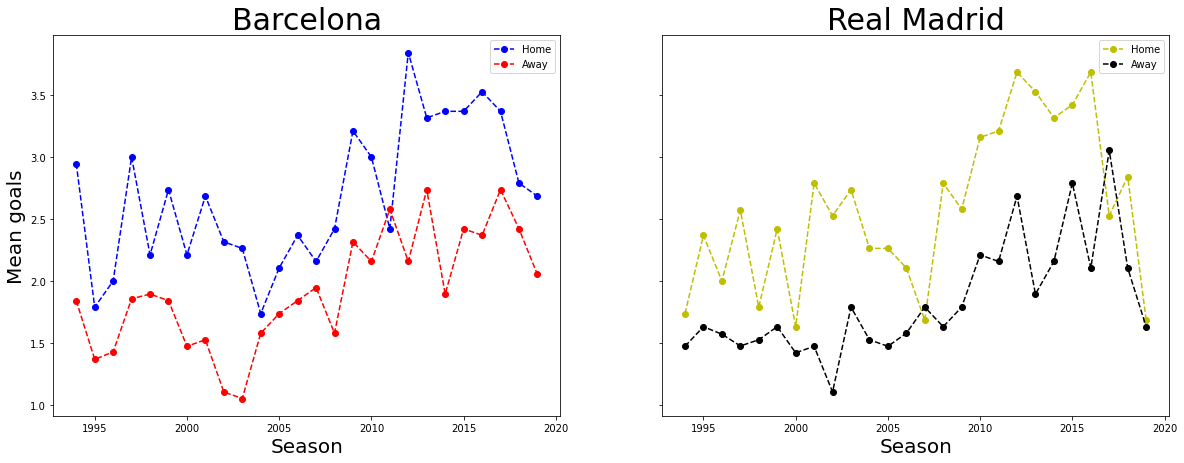

In [19]:
# Plot.
fig, ax = plt.subplots(1,2, sharey = True, figsize = (20,7))
ax[0].set_title('Barcelona', fontsize = 30)
ax[0].set_xlabel('Season', fontsize = 20)
ax[0].set_ylabel('Mean goals', fontsize = 20)
ax[0].plot(Barca['SEASON'], Barca['HOME_MEAN'], marker = 'o', linestyle = '--', color = 'b', label = 'Home')
ax[0].plot(Barca['SEASON'], Barca['AWAY_MEAN'], marker = 'o', linestyle = '--', color = 'r', label = 'Away')
ax[0].legend()
ax[1].set_title('Real Madrid', fontsize = 30)
ax[1].set_xlabel('Season', fontsize = 20)
ax[1].plot(Real_Madrid['SEASON'], Real_Madrid['HOME_MEAN'], marker = 'o', linestyle = '--', color = 'y', label = 'Home')
ax[1].plot(Real_Madrid['SEASON'], Real_Madrid['AWAY_MEAN'], marker = 'o', linestyle = '--', color = 'black', label = 'Away')
ax[1].legend();

### 3. Top 5 teams with best attack/defense

#### Our metric for the best attacking team will be most goals scored, and for the best defensing team it will be least goals conceded

- Attack

In [20]:
# Goals for each team per season scored while playing as home team.
home_sum_goals = la_liga.groupby(['HOMETEAM', 'SEASON'], as_index= False).agg({'HOME_GOALS': 'sum'})
home_sum_goals = home_sum_goals.rename(columns = {'HOME_GOALS': 'HOME_SUM', 'HOMETEAM': 'TEAM'})
# Goals for each team per season scored while playing as away team.
away_sum_goals = la_liga.groupby(['AWAYTEAM', 'SEASON'], as_index= False).agg({'AWAY_GOALS': 'sum'})
away_sum_goals = away_sum_goals.rename(columns = {'AWAY_GOALS': 'AWAY_SUM', 'AWAYTEAM': 'TEAM'})

In [21]:
home_sum_goals.head()

,TEAM,SEASON,HOME_SUM
0,Alaves,1999,25
1,Alaves,2000,23
2,Alaves,2001,34
3,Alaves,2002,22
4,Alaves,2003,18


In [22]:
# Setting indexes to Team and Season columns.
concat_1 = home_sum_goals.set_index(['TEAM', 'SEASON'])
concat_2 = away_sum_goals.set_index(['TEAM', 'SEASON'])
# Joining data and reseting the index.
total_goals_sum = pd.concat([concat_1, concat_2], axis = 1).reset_index()
# Creating new column with total goals scored.
total_goals_sum['TOTAL_GOALS'] = total_goals_sum['HOME_SUM'] + total_goals_sum['AWAY_SUM']
# Dropping the columns that we won't need.
total_goals_sum = total_goals_sum.drop(columns=['HOME_SUM', 'AWAY_SUM'])

In [23]:
# Grouping data by season and finding top 5 teams with more scored goals.
best_attacking_df = total_goals_sum.groupby('SEASON', as_index = False).apply(lambda x : x.nlargest(5, 'TOTAL_GOALS'))
# Reseting index and dropping the columns we won't need.
best_attacking_df = best_attacking_df.reset_index().drop(columns=['level_0', 'level_1'])

In [24]:
# A function that will return top 5 attacking teams for the given season.
def top_5_attack(season):
    return best_attacking_df[best_attacking_df['SEASON'] == season].drop(columns='SEASON').style.hide_index()

In [25]:
top_5_attack(2013)

TEAM,TOTAL_GOALS
Barcelona,115
Real Madrid,103
Sociedad,70
Valencia,67
Ath Madrid,65


- Defense

In [26]:
# Goals for each team per season conceded while playing as home team.
home_sum_goals_con = la_liga.groupby(['HOMETEAM', 'SEASON'], as_index= False).agg({'AWAY_GOALS': 'sum'})
home_sum_goals_con = home_sum_goals_con.rename(columns = {'AWAY_GOALS': 'HOME_SUM', 'HOMETEAM': 'TEAM'})
# Goals for each team per season conceded while playing as away team.
away_sum_goals_con = la_liga.groupby(['AWAYTEAM', 'SEASON'], as_index= False).agg({'HOME_GOALS': 'sum'})
away_sum_goals_con = away_sum_goals_con.rename(columns = {'HOME_GOALS': 'AWAY_SUM', 'AWAYTEAM': 'TEAM'})

In [27]:
home_sum_goals_con.head()

,TEAM,SEASON,HOME_SUM
0,Alaves,1999,17
1,Alaves,2000,18
2,Alaves,2001,24
3,Alaves,2002,21
4,Alaves,2003,20


In [28]:
# Setting indexes to Team and Season columns.
concat_1 = home_sum_goals_con.set_index(['TEAM', 'SEASON'])
concat_2 = away_sum_goals_con.set_index(['TEAM', 'SEASON'])
# Joining data and reseting the index.
total_goals_con_sum = pd.concat([concat_1, concat_2], axis = 1).reset_index()
# Creating new column with total goals conceded.
total_goals_con_sum['TOTAL_GOALS_CONCEDED'] = total_goals_con_sum['HOME_SUM'] + total_goals_con_sum['AWAY_SUM']
# Dropping the columns that we won't need.
total_goals_con_sum = total_goals_con_sum.drop(columns=['HOME_SUM', 'AWAY_SUM'])

In [29]:
# Grouping data by season and finding top 5 teams with least goals conceded.
best_defensing_df = total_goals_con_sum.groupby('SEASON', as_index = False).apply(lambda x : x.nsmallest(5, 'TOTAL_GOALS_CONCEDED'))
# Reseting index and dropping the columns we won't need.
best_defensing_df = best_defensing_df.reset_index().drop(columns=['level_0', 'level_1'])

In [30]:
# A function that will return top 5 defengins teams for the given season.
def top_5_defense(season):
    return best_defensing_df[best_defensing_df['SEASON'] == season].drop(columns='SEASON').style.hide_index()

In [31]:
top_5_defense(2018)

TEAM,TOTAL_GOALS_CONCEDED
Ath Madrid,22
Barcelona,29
Getafe,33
Valencia,38
Espanol,42


###### I didn't write functions for repeating action because there would be a lot of variables and just because this was much faster.